### Analyse du max de std observe de nov 2022

In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
from os import *
from os.path import *
import numpy as np 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

data = pd.read_csv(r"W:\UK\Risk_Control\Risk_Control_Public\MiddleOffice\Alteryx\Singapore\Output_workflow_power_price_check.csv")

France_bl  = data.loc[(data["Index"] == "FRANCE_BL") & (data["Contract_type"] == "Month") , :]
France_bl["Start Date"] = pd.to_datetime(France_bl["Start Date"])
France_bl["Max"] = France_bl.loc[:, ["Ice", "Markit", "Skylight"]].max(axis = 1)
France_bl["Min"]  = France_bl.loc[:, ["Ice", "Markit", "Skylight"]].min(axis = 1)

France_bl["Validated with std"] = np.where( abs(France_bl["TGP"]  - France_bl["Markit"]) > France_bl["Markit Std"], 0, 1 )
France_bl["Validated with 2 prices"] = np.where((France_bl["Max"]> France_bl["TGP"]) & (France_bl["TGP"]> France_bl["Min"]),1,0 )

France_bl.dropna(subset = ["Markit"], inplace = True)
France_bl = round(France_bl,3)
France_bl.head()

,Index,Contract_type,Start Date,TGP,Markit,Skylight,Markit Std,Ice,Max,Min,Validated with std,Validated with 2 prices
390,FRANCE_BL,Month,2022-10-01,450.000,447.260,446.271,2.583,441.36,447.260,441.360,0,0
391,FRANCE_BL,Month,2022-11-01,1000.000,1023.636,1026.875,3.983,1019.00,1026.875,1019.000,0,0
392,FRANCE_BL,Month,2022-12-01,1475.806,1494.613,1493.968,1.217,1496.42,1496.420,1493.968,0,0
393,FRANCE_BL,Month,2023-01-01,1214.725,1218.476,1306.960,99.897,1326.09,1326.090,1218.476,1,0
394,FRANCE_BL,Month,2023-02-01,1095.464,1109.811,1178.977,61.648,1167.21,1178.977,1109.811,1,0


In [13]:
France_bl.loc[France_bl["Markit Std"] == France_bl["Markit Std"].max(), :]

,Index,Contract_type,Start Date,TGP,Markit,Skylight,Markit Std,Ice,Max,Min,Validated with std,Validated with 2 prices
395,FRANCE_BL,Month,2023-03-01,611.952,630.485,474.223,154.763,465.56,630.485,465.56,1,1


In [14]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
print(os.getcwd())
Data = pd.read_csv(r"Data Mark-It Raw 08.csv")

Data = Data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]

C:\Users\rmolli\Desktop\Power-Europe\Data


In [15]:
max_std = Data.loc[(Data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (Data['ns1:Period'] == 'Month') & (Data['ns1:StartDate'] == '2022-11-01 00:00:00')  ,:]
max_std.tail()

,ns1:ValuationDate,ns1:Currency,ns1:Underlying,ns1:Underlying1,ns1:Underlying2,ns1:ClientPrice,ns1:CompositePrice,ns1:ConsensusPrice,ns1:EndDate,ns1:KurtosisPrice,ns1:NumberAcceptedPrice,ns1:Period,ns1:RangePrice,ns1:SkewnessPrice,ns1:StandardDeviationPrice,ns1:StartDate
62811,2022-08-24 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1526.713648,1527.038955,1527.085277,2022-11-30 00:00:00,-1.282835,16.0,Month,20.891131,0.448840,7.425540,2022-11-01 00:00:00
66491,2022-08-25 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1684.186187,1679.190297,1681.908904,2022-11-30 00:00:00,-0.117374,15.0,Month,84.186000,-0.328958,21.086615,2022-11-01 00:00:00
70171,2022-08-26 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1950.421274,1995.627676,1979.576169,2022-11-30 00:00:00,3.839057,13.0,Month,221.054000,-2.178591,58.474020,2022-11-01 00:00:00
73868,2022-08-30 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1310.424313,1202.844403,1201.264879,2022-11-30 00:00:00,2.532392,16.0,Month,372.313164,-1.672321,90.115226,2022-11-01 00:00:00
77601,2022-08-31 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1308.636559,1190.291581,1191.219566,2022-11-30 00:00:00,-0.594612,15.0,Month,117.348800,-0.275731,32.507239,2022-11-01 00:00:00


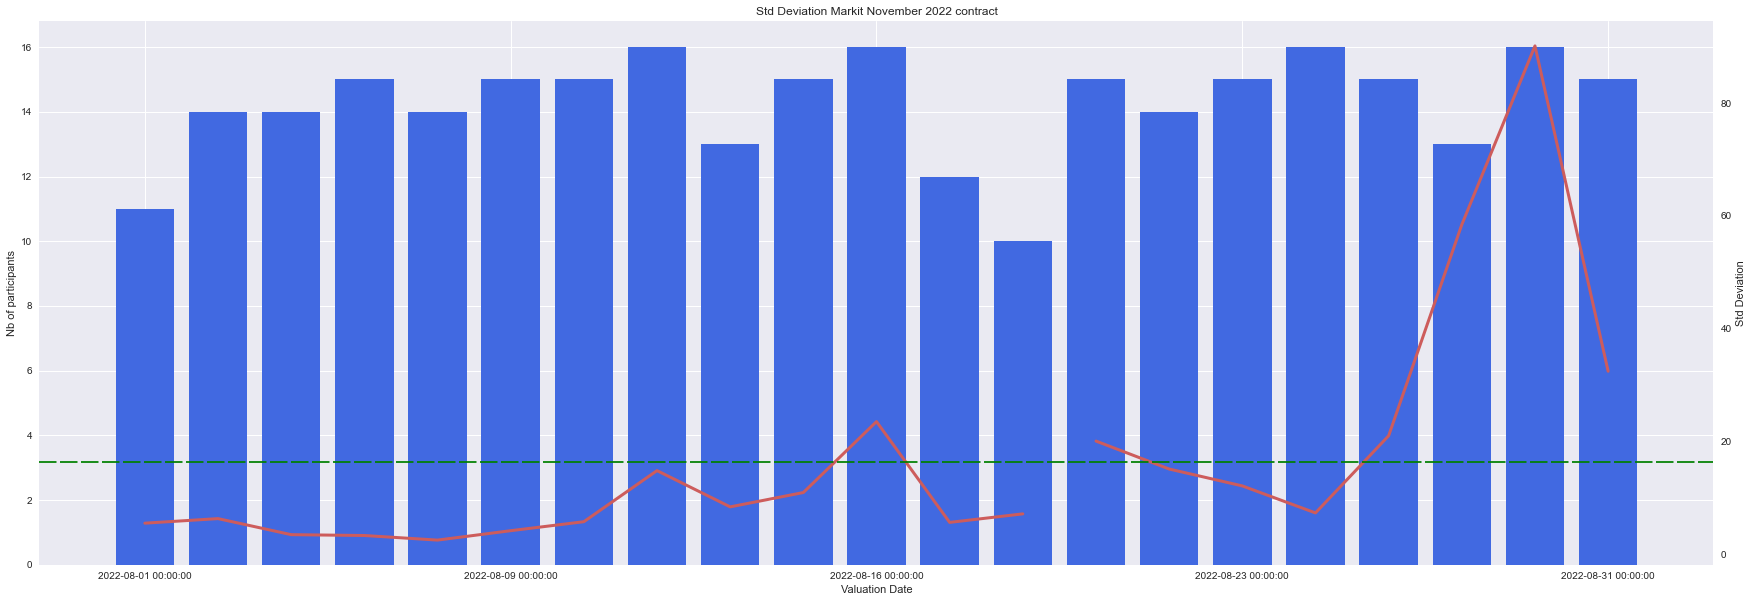

In [16]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
plt.rcParams["axes.grid"] = False

ax.bar(max_std["ns1:ValuationDate"], max_std["ns1:NumberAcceptedPrice"], color = 'royalblue',  linewidth = 3)
ax.set_xlabel('Valuation Date')
ax.set_ylabel('Nb of participants')

ax2 = ax.twinx()
ax2.plot(max_std["ns1:ValuationDate"], max_std["ns1:StandardDeviationPrice"], color = 'indianred', linewidth = 3)
ax2.set_xlabel('Valuation Date')
ax2.set_ylabel('Std Deviation')

plt.axhline(y = max_std["ns1:StandardDeviationPrice"].mean() , color = 'g', linestyle=(0,(10,2)))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.title("Std Deviation Markit November 2022 contract");

plt.show()


In [17]:
Data = pd.read_csv(r"Data Mark-It Raw 07.csv")

Data = Data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]

max_std = Data.loc[(Data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (Data['ns1:Period'] == 'Month') & (Data['ns1:StartDate'] == '2022-11-01 00:00:00')  ,:]
max_std.tail()

,ns1:ValuationDate,ns1:Currency,ns1:Underlying,ns1:Underlying1,ns1:Underlying2,ns1:ClientPrice,ns1:CompositePrice,ns1:ConsensusPrice,ns1:EndDate,ns1:KurtosisPrice,ns1:NumberAcceptedPrice,ns1:Period,ns1:RangePrice,ns1:SkewnessPrice,ns1:StandardDeviationPrice,ns1:StartDate
55148,2022-07-25 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1014.240941,1000.725056,999.258576,2022-11-30 00:00:00,-1.081342,15.0,Month,31.001070,0.425885,NaN,2022-11-01 00:00:00
58745,2022-07-26 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1069.079853,1079.210375,1079.202863,2022-11-30 00:00:00,-0.176427,15.0,Month,42.250776,-0.771337,NaN,2022-11-01 00:00:00
62342,2022-07-27 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1089.841949,1072.508917,1073.622773,2022-11-30 00:00:00,-0.877166,16.0,Month,52.840000,-0.589972,NaN,2022-11-01 00:00:00
65939,2022-07-28 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1050.708668,1040.455005,1040.168853,2022-11-30 00:00:00,-1.276315,16.0,Month,26.701798,0.448735,NaN,2022-11-01 00:00:00
69536,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1015.939649,1015.958699,1015.900044,2022-11-30 00:00:00,-0.651753,14.0,Month,16.473000,-0.541628,NaN,2022-11-01 00:00:00


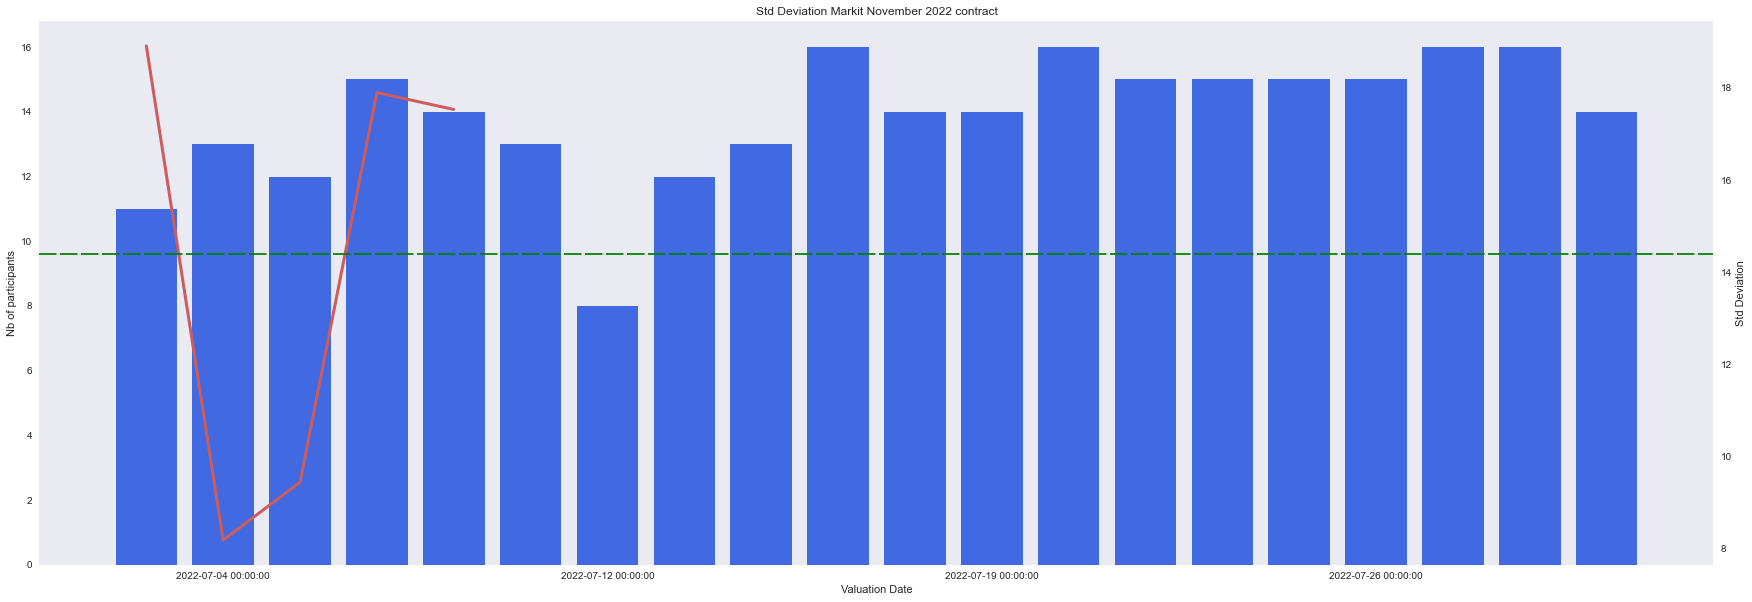

In [18]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
plt.rcParams["axes.grid"] = False

ax.bar(max_std["ns1:ValuationDate"], max_std["ns1:NumberAcceptedPrice"], color = 'royalblue',  linewidth = 3)
ax.set_xlabel('Valuation Date')
ax.set_ylabel('Nb of participants')

ax2 = ax.twinx()
ax2.plot(max_std["ns1:ValuationDate"], max_std["ns1:StandardDeviationPrice"], color = 'indianred', linewidth = 3)
ax2.set_xlabel('Valuation Date')
ax2.set_ylabel('Std Deviation')

plt.axhline(y = max_std["ns1:StandardDeviationPrice"].mean() , color = 'g', linestyle=(0,(10,2)))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.title("Std Deviation Markit November 2022 contract");

plt.show()
